How to read a csv file

In [186]:
import pandas as pd

In [187]:
'''
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import io

# Create a file upload widget that accepts CSV files
upload_widget = widgets.FileUpload(accept='.csv', multiple=False)

# Display the upload widget
display(upload_widget)

# Function to handle the uploaded file
def handle_upload(change):
    # Get the uploaded file content
    uploaded_file = list(upload_widget.value.values())[0]
    content = uploaded_file['content']
    
    # Convert the content to a pandas dataframe
    dataframe = pd.read_csv(io.BytesIO(content))
    print(dataframe)

# Attach the handler function to the upload widget
upload_widget.observe(handle_upload, names='value')

'''

"\nimport ipywidgets as widgets\nfrom IPython.display import display\nimport pandas as pd\nimport io\n\n# Create a file upload widget that accepts CSV files\nupload_widget = widgets.FileUpload(accept='.csv', multiple=False)\n\n# Display the upload widget\ndisplay(upload_widget)\n\n# Function to handle the uploaded file\ndef handle_upload(change):\n    # Get the uploaded file content\n    uploaded_file = list(upload_widget.value.values())[0]\n    content = uploaded_file['content']\n    \n    # Convert the content to a pandas dataframe\n    dataframe = pd.read_csv(io.BytesIO(content))\n    print(dataframe)\n\n# Attach the handler function to the upload widget\nupload_widget.observe(handle_upload, names='value')\n\n"

In [188]:
import os
# Update the file path to the absolute path where the file is located
file_path =r"C:\Users\omweg\Desktop\Data Analysis\Class code\TRADE WEIGHTED AVERAGE INDICATIVE RATES.csv "
df = pd.read_csv(file_path)

df = pd.read_csv("./TRADE WEIGHTED AVERAGE INDICATIVE RATES.csv")

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           5733 non-null   object 
 1   Currency       5733 non-null   object 
 2   EXCHANGE RATE  5733 non-null   float64
dtypes: float64(1), object(2)
memory usage: 134.5+ KB


In [190]:
df. sample(5)

,Date,Currency,EXCHANGE RATE
4247,17/04/2024,KES / TSHS,19.7303
102,03/02/2025,SAUDI RIYAL,34.4523
4120,25/04/2024,KES / USHS,28.6491
3348,20/06/2024,CAN $,93.9069
4075,29/04/2024,STG POUND,166.7483


In [191]:
df.head()
# df['Date'] = pd.to_datetime(df.Date, format='%d%m%Y') 

,Date,Currency,EXCHANGE RATE
0,07/02/2025,US DOLLAR,129.2116
1,07/02/2025,STG POUND,160.0867
2,07/02/2025,EURO,133.9020
3,07/02/2025,SA RAND,6.9549
4,07/02/2025,KES / USHS,28.4417


In [192]:
df.Date

0       07/02/2025
1       07/02/2025
2       07/02/2025
3       07/02/2025
4       07/02/2025
           ...    
5728    05/01/2024
5729    05/01/2024
5730    05/01/2024
5731    05/01/2024
5732    05/01/2024
Name: Date, Length: 5733, dtype: object

In [193]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5733 non-null   datetime64[ns]
 1   Currency       5733 non-null   object        
 2   EXCHANGE RATE  5733 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 134.5+ KB


In [195]:
df["EXCHANGE RATE"] = df['EXCHANGE RATE'].astype(float)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5733 entries, 0 to 5732
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           5733 non-null   datetime64[ns]
 1   Currency       5733 non-null   object        
 2   EXCHANGE RATE  5733 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 134.5+ KB


In [197]:
#slicing
usd = df[df['Currency'] == "US DOLLAR"] 

In [198]:
usd.head()

,Date,Currency,EXCHANGE RATE
0,2025-02-07,US DOLLAR,129.2116
21,2025-02-06,US DOLLAR,129.1938
42,2025-02-05,US DOLLAR,129.2063
63,2025-02-04,US DOLLAR,129.2031
84,2025-02-03,US DOLLAR,129.2187


In [199]:
usd_2024 = usd[usd['Date'].dt.year == 2024]

In [200]:
usd_2024.sample(5)

,Date,Currency,EXCHANGE RATE
1785,2024-10-02,US DOLLAR,129.1988
5334,2024-01-31,US DOLLAR,160.7510
1176,2024-11-15,US DOLLAR,129.3454
882,2024-12-05,US DOLLAR,129.3301
1911,2024-09-24,US DOLLAR,129.1840


In [201]:
df['Month_Name'] = df['Date'].dt.strftime('%B')

In [202]:
print(df)

           Date          Currency  EXCHANGE RATE Month_Name
0    2025-02-07         US DOLLAR       129.2116   February
1    2025-02-07         STG POUND       160.0867   February
2    2025-02-07              EURO       133.9020   February
3    2025-02-07           SA RAND         6.9549   February
4    2025-02-07        KES / USHS        28.4417   February
...         ...               ...            ...        ...
5728 2024-01-05   HONGKONG DOLLAR        20.2221    January
5729 2024-01-05  SINGAPORE DOLLAR       118.8165    January
5730 2024-01-05       SAUDI RIYAL        42.1025    January
5731 2024-01-05      CHINESE YUAN        22.0754    January
5732 2024-01-05      AUSTRALIAN $       106.0780    January

[5733 rows x 4 columns]


Aggregation

In [203]:
usd_2024 = usd_2024.rename(columns={'EXCHANGE RATE': 'rate'})
usd_2024.head()

,Date,Currency,rate
567,2024-12-31,US DOLLAR,129.2927
588,2024-12-30,US DOLLAR,129.2984
609,2024-12-27,US DOLLAR,129.2909
630,2024-12-24,US DOLLAR,129.2988
651,2024-12-23,US DOLLAR,129.2978


In [204]:
# Add Month_Name column to usd_2024 DataFrame
usd_2024['Month_Name'] = usd_2024['Date'].dt.strftime('%B')

# Group by Month_Name and calculate the mean of the rate
monthly_usd_2024 = usd_2024.groupby('Month_Name').agg({'rate':['mean', 'median', 'std', 'min', 'max']})
monthly_usd_2024

rate                                         
                  mean     median       std       min       max
Month_Name                                                     
April       131.569680  131.40045  1.098681  130.2203  133.4697
August      129.323291  129.17305  0.356438  128.9765  130.1570
December    129.363237  129.29840  0.157090  129.2761  129.7727
February    151.839943  153.20390  8.063480  142.7826  160.6722
January     160.082563  160.25000  0.896583  157.9012  161.3576
July        129.871135  129.58540  1.211927  128.4678  132.5695
June        129.365658  129.14970  0.845273  128.4630  131.0338
March       137.353665  136.32050  4.610822  131.8005  143.8630
May         131.690519  131.35950  0.954124  130.2333  133.1980
November    129.398660  129.39090  0.177392  129.1886  129.6754
October     129.195919  129.19660  0.007042  129.1784  129.2084
September   129.204438  129.19230  0.036219  129.1781  129.3000

In [205]:
df.head()

,Date,Currency,EXCHANGE RATE,Month_Name
0,2025-02-07,US DOLLAR,129.2116,February
1,2025-02-07,STG POUND,160.0867,February
2,2025-02-07,EURO,133.9020,February
3,2025-02-07,SA RAND,6.9549,February
4,2025-02-07,KES / USHS,28.4417,February


In [206]:
monthly_usd_2024

rate                                         
                  mean     median       std       min       max
Month_Name                                                     
April       131.569680  131.40045  1.098681  130.2203  133.4697
August      129.323291  129.17305  0.356438  128.9765  130.1570
December    129.363237  129.29840  0.157090  129.2761  129.7727
February    151.839943  153.20390  8.063480  142.7826  160.6722
January     160.082563  160.25000  0.896583  157.9012  161.3576
July        129.871135  129.58540  1.211927  128.4678  132.5695
June        129.365658  129.14970  0.845273  128.4630  131.0338
March       137.353665  136.32050  4.610822  131.8005  143.8630
May         131.690519  131.35950  0.954124  130.2333  133.1980
November    129.398660  129.39090  0.177392  129.1886  129.6754
October     129.195919  129.19660  0.007042  129.1784  129.2084
September   129.204438  129.19230  0.036219  129.1781  129.3000

In [207]:
monthly_usd_2024.index

Index(['April', 'August', 'December', 'February', 'January', 'July', 'June',
       'March', 'May', 'November', 'October', 'September'],
      dtype='object', name='Month_Name')

In [208]:
monthly_usd_2024.reset_index()

Month_Name        rate                                         
                     mean     median       std       min       max
0       April  131.569680  131.40045  1.098681  130.2203  133.4697
1      August  129.323291  129.17305  0.356438  128.9765  130.1570
2    December  129.363237  129.29840  0.157090  129.2761  129.7727
3    February  151.839943  153.20390  8.063480  142.7826  160.6722
4     January  160.082563  160.25000  0.896583  157.9012  161.3576
5        July  129.871135  129.58540  1.211927  128.4678  132.5695
6        June  129.365658  129.14970  0.845273  128.4630  131.0338
7       March  137.353665  136.32050  4.610822  131.8005  143.8630
8         May  131.690519  131.35950  0.954124  130.2333  133.1980
9    November  129.398660  129.39090  0.177392  129.1886  129.6754
10    October  129.195919  129.19660  0.007042  129.1784  129.2084
11  September  129.204438  129.19230  0.036219  129.1781  129.3000

In [209]:
new_names = []
for name in monthly_usd_2024.columns:
    new_names.append(name[0] + '_' + name[1])

monthly_usd_2024.columns = new_names

monthly_usd_2024.head()


,rate_mean,rate_median,rate_std,rate_min,rate_max
Month_Name,,,,,
April,131.569680,131.40045,1.098681,130.2203,133.4697
August,129.323291,129.17305,0.356438,128.9765,130.1570
December,129.363237,129.29840,0.157090,129.2761,129.7727
February,151.839943,153.20390,8.063480,142.7826,160.6722
January,160.082563,160.25000,0.896583,157.9012,161.3576


In [210]:
monthly_usd_2024.columns

Index(['rate_mean', 'rate_median', 'rate_std', 'rate_min', 'rate_max'], dtype='object')

In [211]:
monthly_usd_2024 = monthly_usd_2024.reset_index()
monthly_usd_2024.head()

,Month_Name,rate_mean,rate_median,rate_std,rate_min,rate_max
0,April,131.569680,131.40045,1.098681,130.2203,133.4697
1,August,129.323291,129.17305,0.356438,128.9765,130.1570
2,December,129.363237,129.29840,0.157090,129.2761,129.7727
3,February,151.839943,153.20390,8.063480,142.7826,160.6722
4,January,160.082563,160.25000,0.896583,157.9012,161.3576


In [212]:
# To delete a column
'''
 del usd('Data') # this deletes the column in that has that name
 '''

#run the same for the other currencies


"\n del usd('Data') # this deletes the column in that has that name\n "

# Import a new dataset csv

In [213]:
indf = pd.read_csv(r"C:\Users\omweg\Desktop\Data Analysis\Class code\Inflation Rates.csv")

In [214]:
indf.describe()

,Year,Annual Average Inflation,12-Month Inflation
count,242.000000,242.000000,242.000000
mean,2014.557851,7.631446,7.411942
std,5.793719,3.291361,3.929229
min,2005.000000,3.930000,1.850000
25%,2010.000000,5.402500,4.962500
50%,2015.000000,6.475000,6.330000
75%,2019.750000,8.352500,8.227500
max,2024.000000,17.070000,19.720000


In [215]:
indf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      242 non-null    int64  
 1   Month                     242 non-null    object 
 2   Annual Average Inflation  242 non-null    float64
 3   12-Month Inflation        242 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.7+ KB


In [216]:
indf.sample(5)

,Year,Month,Annual Average Inflation,12-Month Inflation
174,2010,August,4.69,3.22
22,2023,March,8.59,9.19
176,2010,June,5.43,3.49
23,2023,February,8.30,9.23
13,2023,December,7.67,6.63


In [217]:
indf

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2024,December,4.50,2.99
1,2024,November,4.81,2.75
2,2024,October,5.14,2.72
3,2024,September,5.50,3.56
4,2024,August,5.77,4.36
...,...,...,...,...
237,2005,May,14.61,14.78
238,2005,April,13.76,16.02
239,2005,March,13.07,14.15
240,2005,February,12.60,13.94


- Calculate descriptive statistics
- Identify outliers and period of high and low inflation
- Compare inflation with other economic indicators
- Calculate correlation

In [218]:
# calculate descriptive statistics
indf["Annual Average Inflation"].mean()
print("The mean of the Annual Average Inflation is: ", indf["Annual Average Inflation"].mean())

#chack for duplicates
indf.duplicated().sum()
indf[indf.duplicated()]

The mean of the Annual Average Inflation is:  7.631446280991735


,Year,Month,Annual Average Inflation,12-Month Inflation
70,2019,April,4.91,6.58


In [219]:
indf[(indf['Month'] == 'January') & (indf['Year'] == 2024)]

,Year,Month,Annual Average Inflation,12-Month Inflation
11,2024,January,7.50,6.85
12,2024,January,4.81,2.75


In [220]:
indf

,Year,Month,Annual Average Inflation,12-Month Inflation
0,2024,December,4.50,2.99
1,2024,November,4.81,2.75
2,2024,October,5.14,2.72
3,2024,September,5.50,3.56
4,2024,August,5.77,4.36
...,...,...,...,...
237,2005,May,14.61,14.78
238,2005,April,13.76,16.02
239,2005,March,13.07,14.15
240,2005,February,12.60,13.94


Data cleaning

In [221]:
# Drop duplicates
# inflation = inflation[~ inflation.duplicated()]
#inflation = inflation.drop_duplicates

#Drop duplicate january entry
#inflation = inflation. drop(12)

In [222]:
indf = indf[~ indf.duplicated()]

In [223]:
indf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      241 non-null    int64  
 1   Month                     241 non-null    object 
 2   Annual Average Inflation  241 non-null    float64
 3   12-Month Inflation        241 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.4+ KB


In [224]:
# create pivot table to have as rows and month as column
inf_monthly = indf.pivot_table(index= 'Year', columns='Month', values='Annual Average Inflation')

#Define orders of months
month_order = [
    "January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"
]
# sort columns based on predefined order
sorted_columns = sorted(inf_monthly.columns, key= lambda x: month_order.index(x))
# Reorder DataFrame
inf_monthly = inf_monthly[sorted_columns]

inf_monthly


Month,January,February,March,April,May,June,July,August,September,October,November,December
Year,,,,,,,,,,,,
2005,12.270,12.60,13.07,13.76,14.61,15.10,15.34,14.53,13.24,11.99,10.89,9.87
2006,9.360,9.01,8.61,7.77,6.95,6.33,5.73,5.57,5.70,5.94,6.12,6.39
2007,6.080,5.55,4.99,4.69,4.47,4.46,4.57,4.60,4.57,4.48,4.45,4.27
2008,4.690,5.32,6.13,7.32,8.70,9.86,10.83,11.92,13.02,14.13,15.25,16.27
2009,16.560,16.87,17.07,16.72,15.93,15.11,14.35,13.42,12.41,11.42,10.24,9.24
2010,8.640,7.88,7.03,6.32,5.85,5.43,5.03,4.69,4.40,4.12,4.02,3.96
2011,3.930,4.05,4.49,5.20,5.96,6.88,7.88,9.00,10.18,11.49,12.82,14.02
2012,15.100,15.93,16.45,16.50,16.40,15.97,15.27,14.33,13.29,12.04,10.67,9.38
2013,8.200,7.24,6.33,5.61,4.96,4.56,4.44,4.50,4.75,5.05,5.39,5.72


In [225]:
gdp = pd.read_csv(r"C:\Users\omweg\Desktop\Data Analysis\Annual GDP.csv")


gdp['Nominal GDP prices (Ksh Million)'] = gdp['Nominal GDP prices (Ksh Million)'].str.replace(',', '').astype(float)
gdp['Real GDP prices (Ksh Million)'] = gdp['Real GDP prices (Ksh Million)'].str.replace(',', '').astype(float)

In [226]:
gdp.head()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
0,2023,15108806.0,5.6,10399980.0
1,2022,13489642.0,4.9,9852583.0
2,2021,12027662.0,7.6,9395942.0
3,2020,10715070.0,-0.3,8733060.0
4,2019,10237727.0,5.1,8756946.0


In [227]:
gdp.describe()

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million)
count,24.000000,2.400000e+01,24.000000,2.400000e+01
mean,2011.500000,5.558665e+06,4.320833,5.238001e+06
std,7.071068,4.391762e+06,2.214768,3.452537e+06
min,2000.000000,9.678380e+05,-0.300000,9.828550e+05
25%,2005.750000,1.570880e+06,3.575000,1.230298e+06
50%,2011.500000,4.464852e+06,4.950000,6.229327e+06
75%,2017.250000,8.697624e+06,5.600000,7.996864e+06
max,2023.000000,1.510881e+07,8.100000,1.039998e+07


In [228]:
annual_inf_rate = indf.groupby('Year').agg({'12-Month Inflation': ['mean'],'Annual Average Inflation':['mean']})
new_names = []

for name in annual_inf_rate.columns:
    new_names.append(name[0] + '_' + name[1])

annual_inf_rate.columns = new_names
annual_inf_rate = annual_inf_rate.reset_index()
annual_inf_rate



,Year,12-Month Inflation_mean,Annual Average Inflation_mean
0,2005,10.116667,13.105833
1,2006,6.416667,6.956667
2,2007,4.265833,4.765000
3,2008,16.230833,10.286667
4,2009,9.385000,14.111667
5,2010,3.971667,5.614167
6,2011,13.975833,7.991667
7,2012,9.640000,14.277500
8,2013,5.715833,5.562500
9,2014,6.884167,6.810833


Mearge the dataset

In [ ]:
merged_inf_gdp = gdp.merge(annual_inf_rate,  on='Year')
merged_inf_gdp

,Year,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),12-Month Inflation_mean,Annual Average Inflation_mean
0,2023,15108806.0,5.6,10399980.0,7.695833,8.355000
1,2022,13489642.0,4.9,9852583.0,7.637500,6.624167
2,2021,12027662.0,7.6,9395942.0,6.110833,5.471667
3,2020,10715070.0,-0.3,8733060.0,5.285833,5.791667
4,2019,10237727.0,5.1,8756946.0,5.115833,5.054167
5,2018,9340307.0,5.6,8330891.0,4.695000,5.587500
6,2017,8483396.0,3.8,7885521.0,8.018333,7.670833
7,2016,7594064.0,4.2,7594064.0,6.303333,6.575833
8,2015,6884317.0,5.0,7287024.0,6.575833,6.537500
9,2014,6003835.0,5.0,6942157.0,6.884167,6.810833


In [230]:
merged_inf_gdp.iloc[:,1:].corr()

,Nominal GDP prices (Ksh Million),Annual GDP growth (%),Real GDP prices (Ksh Million),12-Month Inflation_mean,Annual Average Inflation_mean
Nominal GDP prices (Ksh Million),1.000000,-0.052199,0.910738,-0.313947,-0.374614
Annual GDP growth (%),-0.052199,1.000000,-0.066342,-0.372846,-0.265513
Real GDP prices (Ksh Million),0.910738,-0.066342,1.000000,-0.340344,-0.331892
12-Month Inflation_mean,-0.313947,-0.372846,-0.340344,1.000000,0.627131
Annual Average Inflation_mean,-0.374614,-0.265513,-0.331892,0.627131,1.000000


Find thr correlation between a currency of choice and inflation

In [231]:
Exchange = pd.read_csv(r"C:\Users\omweg\Desktop\Data Analysis\167615241_Monthly Exchange rate (period average).csv", skiprows = 1)

In [232]:
Exchange.head()

,Year,Month,United States dollar,Sterling pound,Euro,South Africa Rand,Uganda shilling\2,Tanzania shilling\2,Rwanda Franc,Burundi Franc,...,Danish kroner,Austrian schilling,Finn marka,Spanish peseta,Indian rupee,Hong kong dollar,Singapore dollar,Saudi riyal,Chinese Yuan,Australian dollar
0,1993,1,36.23,55.62,NaN,NaN,NaN,NaN,NaN,NaN,...,5.74,3.19,6.71,31.64,1.40,NaN,NaN,NaN,NaN,NaN
1,1993,2,36.56,52.68,NaN,NaN,NaN,NaN,NaN,NaN,...,5.78,3.17,6.29,31.16,1.41,NaN,NaN,NaN,NaN,NaN
2,1993,3,43.12,62.92,NaN,NaN,NaN,NaN,NaN,NaN,...,6.78,3.72,7.21,36.62,1.44,NaN,NaN,NaN,NaN,NaN
3,1993,4,51.88,80.34,NaN,NaN,NaN,NaN,NaN,NaN,...,8.48,4.63,9.47,45.90,1.65,NaN,NaN,NaN,NaN,NaN
4,1993,5,62.16,96.38,NaN,NaN,NaN,NaN,NaN,NaN,...,10.08,5.5,11.33,51.43,1.98,NaN,NaN,NaN,NaN,NaN


In [233]:
Exchange.sample(5)

,Year,Month,United States dollar,Sterling pound,Euro,South Africa Rand,Uganda shilling\2,Tanzania shilling\2,Rwanda Franc,Burundi Franc,...,Danish kroner,Austrian schilling,Finn marka,Spanish peseta,Indian rupee,Hong kong dollar,Singapore dollar,Saudi riyal,Chinese Yuan,Australian dollar
205,2010,2,76.73,120.10,105.09,10.01,26.00,17.58,NaN,NaN,...,14.11,NaN,NaN,NaN,1.65,9.88,54.34,20.46,11.24,68.01
296,2017,9,103.12,137.09,122.85,7.85,34.90,21.74,8.07,16.92,...,16.51,NaN,NaN,NaN,1.60,13.19,76.39,27.49,15.70,82.23
117,2002,10,79.32,123.57,77.85,7.68,23.04,12.30,NaN,NaN,...,10.48,NaN,NaN,NaN,1.64,10.17,44.43,21.15,NaN,43.61
123,2003,4,75.66,119.18,82.18,9.82,26.14,13.74,NaN,NaN,...,11.06,NaN,NaN,NaN,1.60,9.70,42.58,20.17,NaN,46.08
27,1995,4,43.99,70.79,NaN,12.21,NaN,NaN,NaN,NaN,...,8.12,4.54,10.3,NaN,1.40,NaN,NaN,NaN,NaN,NaN


In [234]:
# clean data 
#pound_exchange = Exchange[Exchange['Sterling pound']]
Exchange["Sterling pound"].isnull().sum()

np.int64(0)

In [235]:
# Group by Year and calculate the mean, median, standard deviation, minimum, and maximum of the Sterling pound
pound_exchange = Exchange.groupby('Year').agg({'Sterling pound':['mean', 'median', 'std', 'min', 'max']})
pound_exchange

Sterling pound                                    
               mean   median        std     min     max
Year                                                   
1993      87.260833   97.355  19.229322   52.68  102.16
1994      85.495833   86.100  11.739093   67.99  101.33
1995      81.142500   85.760   8.180385   69.94   90.25
1996      89.164167   88.815   1.578892   86.79   92.44
1997      96.245833   93.515   8.128073   87.79  107.88
1998     100.044167   99.830   1.788267   97.02  103.19
1999     113.795833  116.300   8.542663  101.83  125.26
2000     115.371667  115.265   1.921244  112.00  117.82
2001     113.157500  113.305   1.756091  110.29  116.25
2002     118.314167  118.720   5.686099  111.06  126.08
2003     124.130000  123.185   4.917470  116.19  132.93
2004     145.050000  144.795   4.433404  138.95  153.94
2005     137.557500  137.695   6.606952  127.62  146.51
2006     132.820000  135.475   4.985853  125.61  137.85
2007     134.045833  135.490   4.676103  119.89  136.91
2008     127.290000  128.275   6.319366  116.53  138.46
2009     120.904167  122.095   4.867335  113.98  127.22
2010     122.510000  123.435   4.588634  115.20  128.52
2011     142.335833  141.970   9.452713  127.70  159.41
2012     133.996667  133.565   2.600120  131.18  138.78
2013     134.750000  135.505   4.375770  128.73  141.37
2014     144.873333  144.375   2.756689  141.45  150.01
2015     150.174167  152.725   8.934958  137.51  161.54
2016     137.659167  138.830   8.611947  125.47  147.53
2017     133.195833  133.850   3.777333  126.87  138.24
2018     135.335000  133.410   4.975272  129.68  141.95
2019     130.180000  130.470   2.058371  125.59  132.88
2020     136.636667  134.340   6.334719  128.54  148.42
2021     150.835000  151.015   0.973732  149.30  152.21
2022     145.803333  144.955   5.903944  136.60  153.71
2023     174.009167  179.065  14.352603  151.33  194.98
2024     172.270833  167.095  12.299518  163.64  202.88
2025     159.800000  159.800        NaN  159.80  159.80

In [236]:
# Rename columns and reset index
new_names = []

for name in pound_exchange.columns:
    new_names.append(name[0] + '_' + name[1])

pound_exchange.columns = new_names
pound_exchange = pound_exchange.reset_index()

pound_exchange

,Year,Sterling pound_mean,Sterling pound_median,Sterling pound_std,Sterling pound_min,Sterling pound_max
0,1993,87.260833,97.355,19.229322,52.68,102.16
1,1994,85.495833,86.100,11.739093,67.99,101.33
2,1995,81.142500,85.760,8.180385,69.94,90.25
3,1996,89.164167,88.815,1.578892,86.79,92.44
4,1997,96.245833,93.515,8.128073,87.79,107.88
5,1998,100.044167,99.830,1.788267,97.02,103.19
6,1999,113.795833,116.300,8.542663,101.83,125.26
7,2000,115.371667,115.265,1.921244,112.00,117.82
8,2001,113.157500,113.305,1.756091,110.29,116.25
9,2002,118.314167,118.720,5.686099,111.06,126.08


In [237]:
# Filter the pound_exchange DataFrame to include only data from 2005 onwards
pound_rate= pound_exchange[pound_exchange['Year'] >= 2005]
pound_rate

,Year,Sterling pound_mean,Sterling pound_median,Sterling pound_std,Sterling pound_min,Sterling pound_max
12,2005,137.557500,137.695,6.606952,127.62,146.51
13,2006,132.820000,135.475,4.985853,125.61,137.85
14,2007,134.045833,135.490,4.676103,119.89,136.91
15,2008,127.290000,128.275,6.319366,116.53,138.46
16,2009,120.904167,122.095,4.867335,113.98,127.22
17,2010,122.510000,123.435,4.588634,115.20,128.52
18,2011,142.335833,141.970,9.452713,127.70,159.41
19,2012,133.996667,133.565,2.600120,131.18,138.78
20,2013,134.750000,135.505,4.375770,128.73,141.37
21,2014,144.873333,144.375,2.756689,141.45,150.01


In [238]:
pound_rate.reset_index()
pound_rate

,Year,Sterling pound_mean,Sterling pound_median,Sterling pound_std,Sterling pound_min,Sterling pound_max
12,2005,137.557500,137.695,6.606952,127.62,146.51
13,2006,132.820000,135.475,4.985853,125.61,137.85
14,2007,134.045833,135.490,4.676103,119.89,136.91
15,2008,127.290000,128.275,6.319366,116.53,138.46
16,2009,120.904167,122.095,4.867335,113.98,127.22
17,2010,122.510000,123.435,4.588634,115.20,128.52
18,2011,142.335833,141.970,9.452713,127.70,159.41
19,2012,133.996667,133.565,2.600120,131.18,138.78
20,2013,134.750000,135.505,4.375770,128.73,141.37
21,2014,144.873333,144.375,2.756689,141.45,150.01


In [239]:
# merge inflation and pound exchange rate
merged_inf_pound = pound_rate.merge(annual_inf_rate,  on='Year')
merged_inf_pound

,Year,Sterling pound_mean,Sterling pound_median,Sterling pound_std,Sterling pound_min,Sterling pound_max,12-Month Inflation_mean,Annual Average Inflation_mean
0,2005,137.557500,137.695,6.606952,127.62,146.51,10.116667,13.105833
1,2006,132.820000,135.475,4.985853,125.61,137.85,6.416667,6.956667
2,2007,134.045833,135.490,4.676103,119.89,136.91,4.265833,4.765000
3,2008,127.290000,128.275,6.319366,116.53,138.46,16.230833,10.286667
4,2009,120.904167,122.095,4.867335,113.98,127.22,9.385000,14.111667
5,2010,122.510000,123.435,4.588634,115.20,128.52,3.971667,5.614167
6,2011,142.335833,141.970,9.452713,127.70,159.41,13.975833,7.991667
7,2012,133.996667,133.565,2.600120,131.18,138.78,9.640000,14.277500
8,2013,134.750000,135.505,4.375770,128.73,141.37,5.715833,5.562500
9,2014,144.873333,144.375,2.756689,141.45,150.01,6.884167,6.810833


In [240]:
# calculate correlation
merged_inf_pound.iloc[:,1:].corr()

,Sterling pound_mean,Sterling pound_median,Sterling pound_std,Sterling pound_min,Sterling pound_max,12-Month Inflation_mean,Annual Average Inflation_mean
Sterling pound_mean,1.000000,0.988760,0.666683,0.936083,0.967891,-0.150790,-0.225125
Sterling pound_median,0.988760,1.000000,0.681504,0.895705,0.945575,-0.128397,-0.205375
Sterling pound_std,0.666683,0.681504,1.000000,0.412203,0.796549,0.131932,0.001121
Sterling pound_min,0.936083,0.895705,0.412203,1.000000,0.871176,-0.250487,-0.243487
Sterling pound_max,0.967891,0.945575,0.796549,0.871176,1.000000,-0.059087,-0.162755
12-Month Inflation_mean,-0.150790,-0.128397,0.131932,-0.250487,-0.059087,1.000000,0.636885
Annual Average Inflation_mean,-0.225125,-0.205375,0.001121,-0.243487,-0.162755,0.636885,1.000000


# Pandas Plotting

In [241]:
annual_inf_rate.head()

,Year,12-Month Inflation_mean,Annual Average Inflation_mean
0,2005,10.116667,13.105833
1,2006,6.416667,6.956667
2,2007,4.265833,4.765000
3,2008,16.230833,10.286667
4,2009,9.385000,14.111667


<Axes: title={'center': 'Annual Average Inflation_mean(2005-2024)'}, ylabel='Avg Inflation Rate'>

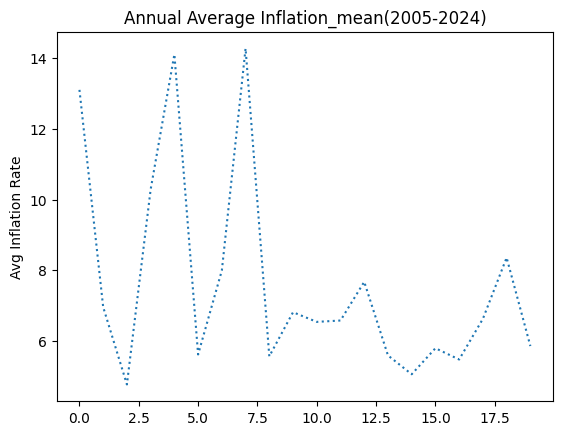

In [247]:
# 'line', 'bar', 'barh', 'hist', 'kde','density', 'area', 'pie', 'scatter', 'box', 'violin', 'hexbin
annual_inf_rate['Annual Average Inflation_mean'].plot(kind = 'line', title = 'Annual Average Inflation_mean(2005-2024)', ylabel = 'Avg Inflation Rate', style= ':')

<Axes: title={'center': 'Annual GDP growth'}, xlabel='Year', ylabel='Growth(%)'>

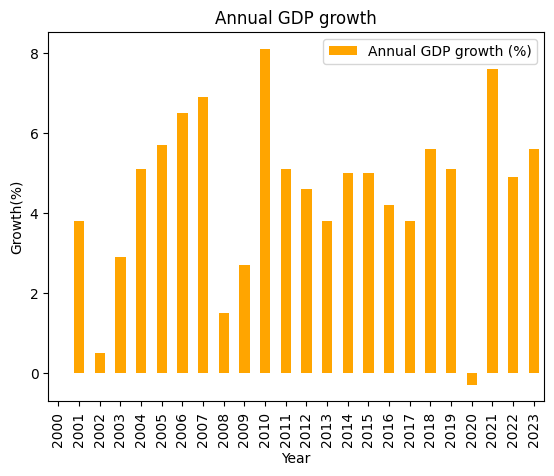

In [252]:
gdp = gdp. sort_values(by = 'Year',ascending=True)
# create plot of Annual GDP growth
gdp.plot(x ='Year', y = 'Annual GDP growth (%)', kind = 'bar', color = 'orange', title = 'Annual GDP growth', ylabel = 'Growth(%)')

<Axes: title={'center': 'Inflation vs GDP growth rate'}, xlabel='12-Month Inflation_mean', ylabel='Avg Inflation Rate'>

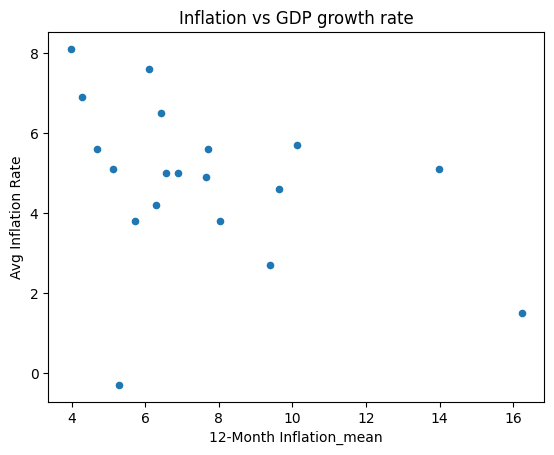

: 

In [ ]:
# scatter plot annual growth gdp vs inflation
merged_inf_gdp.plot(x = '12-Month Inflation_mean', y = 'Annual GDP growth (%)', kind = 'scatter', title = 'Inflation vs GDP growth rate', ylabel = 'Avg Inflation Rate')